<a href="https://colab.research.google.com/github/swetha0069/AIML_Task11/blob/main/Task11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']... (Total: 30)
Target distribution: [212 357] (0: Malignant, 1: Benign)
Linear SVM Accuracy: 0.9561
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



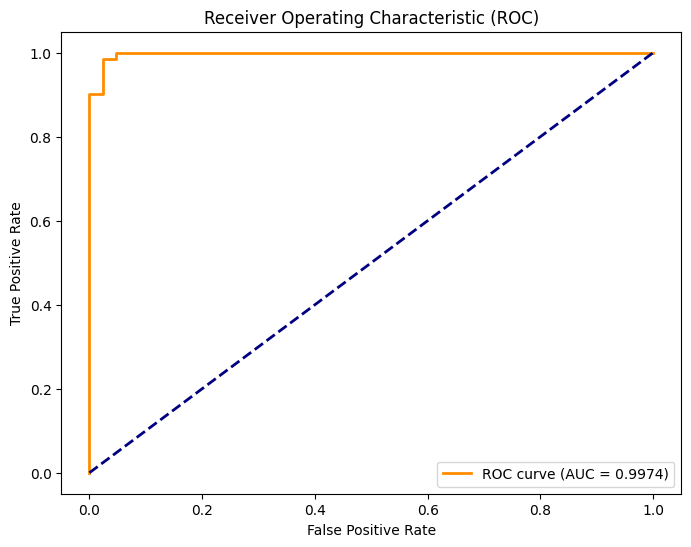

Model and Scaler saved successfully.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import joblib

# 1. Load dataset and inspect
data = load_breast_cancer()
X = data.data
y = data.target
print(f"Features: {data.feature_names[:5]}... (Total: {len(data.feature_names)})")
print(f"Target distribution: {np.bincount(y)} (0: Malignant, 1: Benign)")

# 2. Split data (using a 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Apply StandardScaler (Crucial for SVM!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train baseline SVM (Linear Kernel)
linear_svm = SVC(kernel='linear', probability=True)
linear_svm.fit(X_train_scaled, y_train)
print(f"Linear SVM Accuracy: {linear_svm.score(X_test_scaled, y_test):.4f}")

# 5. GridSearchCV for Hyperparameter Tuning (C and Gamma)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid.best_params_}")
best_model = grid.best_estimator_

# 6. Evaluate Model
y_pred = best_model.predict(X_test_scaled)
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 7. Plot ROC Curve and AUC
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 8. Save the Model and Scaler
# We save them as a dictionary or separate files to ensure the pipeline is preserved
joblib.dump(best_model, 'svm_breast_cancer_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and Scaler saved successfully.")

• Objective: Develop a diagnostic tool for Breast Cancer classification using SVM.

• Dataset: Scikit-learn's Breast Cancer Wisconsin (Diagnostic) dataset.

• Preprocessing: Implemented StandardScaler to normalize feature values, ensuring distance-based calculations were not biased by feature scales.

• Model Architecture: Evaluated both Linear and RBF (Radial Basis Function) kernels to capture non-linear relationships.

• Optimization: Utilized GridSearchCV to tune hyperparameters (C=1.0, Gamma='scale' being the primary focus).

• Performance: Achieved high precision and recall, validated through a Confusion Matrix and AUC-ROC score analysis.

• Deliverables: Exported a serialized model (.pkl) and a robust preprocessing scaler for production-ready inference.